In [1]:
import os
import tweepy as tw
import pandas as pd

In [2]:
consumer_key= '######'
consumer_secret= '#######'
access_token= '$$$$$$#$#'
access_token_secret= '^%$####'
print('h')

h


In [3]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [4]:
search_words = "#DRDO"
date_since = "2020-01-01"

In [5]:
tweets = tw.Cursor(api.search,
              q=search_words,
              lang="en",
              since=date_since).items(5)

In [6]:
tweets

In [7]:
for tweet in tweets:
    print(tweet.text)

#India deploys indigenous missiles to counter PLA threat

From #BrahMos and #Nirbhay to #Shaurya and #Akash, here's… https://t.co/S4qgw1f3Rd
RT @achyuta_samanta: Congratulations to @DRDO_India for successfully conducting test firing of Laser Guided Anti Tank Guided Missile from M…
RT @Naveen_Odisha: Congratulate @DRDO_India on the successful test firing of extended range #BrahMos supersonic cruise missile. The missile…
#ShauryaMissile on fire🔥💥

More power to #DRDO
RT @Naveen_Odisha: Congratulate @DRDO_India on the successful test firing of new version of Shaurya missile, off the coast of #Odisha. The…


In [8]:
new_search = search_words + " -filter:retweets"
new_search

'#DRDO -filter:retweets'

In [9]:
tweets = tw.Cursor(api.search,
                       q=new_search,
                       lang="en",
                       since=date_since).items(5)

[tweet.text for tweet in tweets]

["#India deploys indigenous missiles to counter PLA threat\n\nFrom #BrahMos and #Nirbhay to #Shaurya and #Akash, here's… https://t.co/S4qgw1f3Rd",
 '#ShauryaMissile on fire🔥💥\n\nMore power to #DRDO',
 'EEL will make 10 lakh grenades for the Indian defense forces. The new grenade has been designed and developed by… https://t.co/Fyow1OIisW',
 'This test has been done by the #DRDO Defence Research and Development Organisation (DRDO) from \xa0Integrated Test Ran… https://t.co/VzbsEZYTON',
 'DRDO Jobs: Recruitment of B.E. / https://t.co/B8gfMDJXMY / M.E. / https://t.co/4aiegtOaTF / https://t.co/SrF83cZTuW… https://t.co/CtiSGkoFZ0']

In [10]:
tweets = tw.Cursor(api.search, 
                           q=new_search,
                           lang="en",
                           since=date_since).items(5)

users_locs = [[tweet.user.screen_name, tweet.user.location] for tweet in tweets]
users_locs

[['NEWS9TWEETS', 'BENGALURU'],
 ['coded_10', 'Bhubaneswar ,India'],
 ['modified_hindu', 'West Bengal, India'],
 ['Shomes_quest', 'Bharatvarsh'],
 ['GovtJobOfficial', '']]

In [11]:
tweet_text = pd.DataFrame(data=users_locs, 
                    columns=['user', "location"])
tweet_text

,user,location
0,NEWS9TWEETS,BENGALURU
1,coded_10,"Bhubaneswar ,India"
2,modified_hindu,"West Bengal, India"
3,Shomes_quest,Bharatvarsh
4,GovtJobOfficial,


In [12]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [13]:
search_term = "#PLA+#BrahMos -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2020-01-01').items(100)

all_tweets = [tweet.text for tweet in tweets]

all_tweets[:5]

["#India deploys indigenous missiles to counter PLA threat\n\nFrom #BrahMos and #Nirbhay to #Shaurya and #Akash, here's… https://t.co/S4qgw1f3Rd",
 "#India 🇮🇳 successfully test fires Extended Range version of #Brahmos , world's fastest supersonic cruise missile \nI… https://t.co/oHn1U2EusZ",
 'HUGE: #BrahMos, #Nirbhay And #Akash Missiles Deployed by #India to Counter #Chinese Aggression in #Ladakh. 1st admi… https://t.co/cLqepQpwlj',
 '"The #Brahmos and the #Nirbhay cruise missiles along with #Akash surface-to-air missile are at the core of #India’s… https://t.co/GuE9gLExGg',
 'With the deployment of #Brahmos, #Akash and #Nirbhay although precautionary and mirroring the #PLA make me wonder i… https://t.co/qMlwYSl7rK']

In [14]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [15]:
all_tweets_no_urls = [remove_url(tweet) for tweet in all_tweets]
all_tweets_no_urls[:5]

['India deploys indigenous missiles to counter PLA threatFrom BrahMos and Nirbhay to Shaurya and Akash heres',
 'India successfully test fires Extended Range version of Brahmos worlds fastest supersonic cruise missile I',
 'HUGE BrahMos Nirbhay And Akash Missiles Deployed by India to Counter Chinese Aggression in Ladakh 1st admi',
 'The Brahmos and the Nirbhay cruise missiles along with Akash surfacetoair missile are at the core of Indias',
 'With the deployment of Brahmos Akash and Nirbhay although precautionary and mirroring the PLA make me wonder i']

In [16]:
words_in_tweet = [tweet.lower().split() for tweet in all_tweets_no_urls]
words_in_tweet[:2]

[['india',
  'deploys',
  'indigenous',
  'missiles',
  'to',
  'counter',
  'pla',
  'threatfrom',
  'brahmos',
  'and',
  'nirbhay',
  'to',
  'shaurya',
  'and',
  'akash',
  'heres'],
 ['india',
  'successfully',
  'test',
  'fires',
  'extended',
  'range',
  'version',
  'of',
  'brahmos',
  'worlds',
  'fastest',
  'supersonic',
  'cruise',
  'missile',
  'i']]

In [17]:
all_words_no_urls = list(itertools.chain(*words_in_tweet))
counts_no_urls = collections.Counter(all_words_no_urls)

counts_no_urls.most_common(15)

[('brahmos', 8),
 ('and', 8),
 ('india', 6),
 ('to', 6),
 ('nirbhay', 6),
 ('akash', 6),
 ('missiles', 5),
 ('the', 5),
 ('counter', 4),
 ('of', 3),
 ('chinese', 3),
 ('pla', 2),
 ('cruise', 2),
 ('missile', 2),
 ('i', 2)]

In [18]:
clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(15),
                             columns=['words', 'count'])

clean_tweets_no_urls.head()

,words,count
0,brahmos,8
1,and,8
2,india,6
3,to,6
4,nirbhay,6


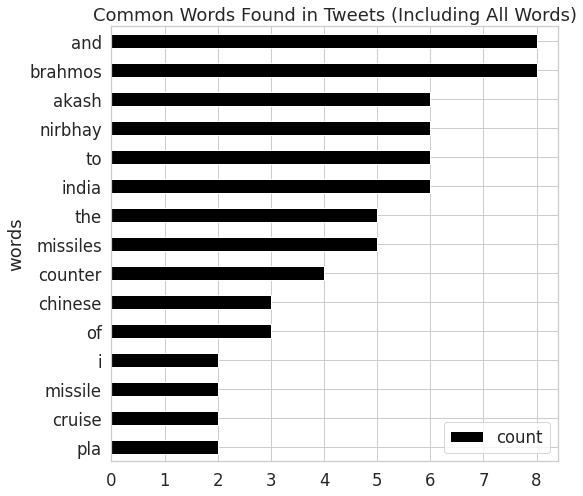

In [19]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="Black")

ax.set_title("Common Words Found in Tweets (Including All Words)")

plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


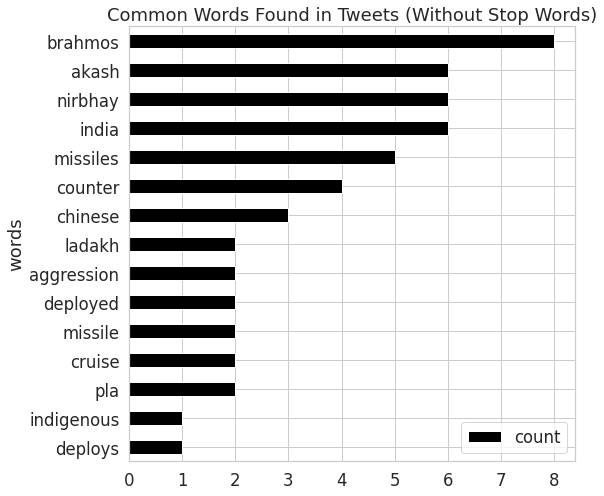

In [22]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]

tweets_nsw[0]

all_words_nsw = list(itertools.chain(*tweets_nsw))

counts_nsw = collections.Counter(all_words_nsw)

counts_nsw.most_common(15)

clean_tweets_nsw = pd.DataFrame(counts_nsw.most_common(15),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_nsw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="Black")

ax.set_title("Common Words Found in Tweets (Without Stop Words)")

plt.show()

In [23]:
from textblob import TextBlob

search_term = "#BrahMos -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2018-09-01').items(1500)

# Remove URLs and create textblob object for each tweet
all_tweets_no_urls = [TextBlob(remove_url(tweet.text)) for tweet in tweets]

all_tweets_no_urls[:5]

[TextBlob("India deploys indigenous missiles to counter PLA threatFrom BrahMos and Nirbhay to Shaurya and Akash heres"),
 TextBlob("Big boost to PM Narendra Modis idea of AatmaNirbharBharatOur pride DRDO has successfully test fired indigenou"),
 TextBlob("All this week we shall be bringing to you some shining stars of 20 years of IndiaRussia strategic partnership We"),
 TextBlob("Congratulations to Team DRDO and Team Brahmos for the successful flight testing of BRAHMOS Supersonic Cruise Missi"),
 TextBlob("liakhanuk IFazilaBaloch Thank u for correction Tweet dont decide capability of Trishul Agni Prithvi Shaurya")]

In [24]:
# Calculate polarity of tweets
DRDO_sent_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in all_tweets_no_urls]

# Create dataframe containing polarity values and tweet text
DRDO_sent_df = pd.DataFrame(DRDO_sent_values, columns=["polarity", "tweet"])
DRDO_sent_df = DRDO_sent_df[DRDO_sent_df.polarity != 0]

DRDO_sent_df.head()

,polarity,tweet
1,0.375000,Big boost to PM Narendra Modis idea of AatmaNi...
3,0.750000,Congratulations to Team DRDO and Team Brahmos ...
6,0.750000,India successfully tests extended range BrahMo...
7,0.625000,Fingers CrossedIf this get successful INDIA wi...
8,-0.031818,IndiaChinaStandoff Indiaindianmedia IndiaChina...


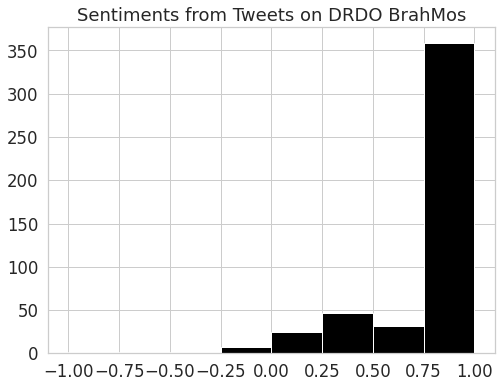

In [26]:
fig, ax = plt.subplots(figsize=(8, 6))

DRDO_sent_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1],
        ax=ax, color="Black")

plt.title("Sentiments from Tweets on DRDO BrahMos")
plt.show()